### 파이토치 구성요소  
- torch : 메인, 텐서 등의 다양한 수학 함수 포함  
- torch.autograd : 자동 미분 기능을 제공  
- torch.nn : 신경망 구축을 위한 데이터 구조나 레이어  
- torch.multiprocessing : 병렬처리 기능을 제공  
- torch.optim : SGD(Stochastic Gradient Descent(확률적 경사 하강법))를 중심으로 한 파라미터 최적화 알고리즘 제공  
- torch.utils : 데이터 조작 등 유틸리티 기능 제공  
- torch.onnx : ONNX(Open Neural Network Exchange) 서로 다른 프레임워크 간의 모델을 공유할 때 사용

In [17]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())


2.3.1+cpu
False
0


AssertionError: Torch not compiled with CUDA enabled

In [5]:
import torch

x = torch.empty(4,2)
y = torch.rand(4,2)
z = torch.zeros(4,2, dtype=torch.long)
print(x)
print(y)
print(z)

tensor([[-3.4937e-10,  2.0221e-42],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]])
tensor([[0.4650, 0.6982],
        [0.2034, 0.0896],
        [0.0733, 0.7235],
        [0.8214, 0.1038]])
tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [121]:
# 사용자 입력 텐서
x = torch.tensor([3, 2.3])
y = torch.ones(2,4, dtype=torch.double)
y

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

### view : 텐서의 크기(size)나 모양(shape)을 변경  
- 기본적으로 변경 전/후 원소 개수 유지되야함  
- -1로 설정하면 자동으로 지정  
### item : 텐서에 값이 하나만 존재할 경우 숫자값 반환  
### squeeze : 차원 축소  
### unsqueeze : 차원 확대 

In [122]:
x = torch.rand(1,3,3)
print(x)
print(x.view(-1))
print(x.squeeze())

y = torch.rand(3,3)
print(y)
print(y.unsqueeze(dim=0))

tensor([[[0.6134, 0.5488, 0.4152],
         [0.8141, 0.2291, 0.6162],
         [0.0060, 0.1347, 0.4212]]])
tensor([0.6134, 0.5488, 0.4152, 0.8141, 0.2291, 0.6162, 0.0060, 0.1347, 0.4212])
tensor([[0.6134, 0.5488, 0.4152],
        [0.8141, 0.2291, 0.6162],
        [0.0060, 0.1347, 0.4212]])
tensor([[0.9100, 0.1595, 0.3528],
        [0.7496, 0.0670, 0.5166],
        [0.8233, 0.1256, 0.6823]])
tensor([[[0.9100, 0.1595, 0.3528],
         [0.7496, 0.0670, 0.5166],
         [0.8233, 0.1256, 0.6823]]])


## Autograd(자동미분)  
- torch.autograd는 Tensor의 모든 연산에 대해 자동 미분 제공  
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻  
- backprop(역전파)를 위해 미분값을 자동으로 계산  

requires_grad 속성을 True로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작  
기록을 추적하는 것을 중단하게하려면, .detach() 를 호출

In [123]:
a = torch.randn(3,3)
a = a*3
print(a)
print(a.requires_grad) #기본값은 False

tensor([[-4.0335,  0.9060,  0.9272],
        [-2.1452,  2.3406, -1.0729],
        [ 1.4654, -3.9219, -3.0600]])
False


In [124]:
a.requires_grad_(True) #in-place 

tensor([[-4.0335,  0.9060,  0.9272],
        [-2.1452,  2.3406, -1.0729],
        [ 1.4654, -3.9219, -3.0600]], requires_grad=True)

In [125]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [126]:
y = x+5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


계산이 완료된 후, .backward()를 호출하면 자동으로 역전파 계산한 다음에 .grad속성에 누적함

In [127]:
z = y.sum()
print(z)
z.backward()

tensor(54., grad_fn=<SumBackward0>)


grad : data가 거쳐온 layer에 대한 미분값 저장

In [128]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


#### 자동미분 흐름 예시  
- 계산 흐름 : a -> b -> c -> out  
- 미분 out / a = ?  
- backward()를 통해 a <- b <- c <- out을 계산하면 미분 out / a 값이 a.grad에 채워짐

In [129]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [130]:
print(a.data) 
print(a.grad) #초기
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


In [131]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [132]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [133]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [134]:
out.backward()

In [135]:
print(a.data) 
print(a.grad) # 왜 값이 6이나왔냐면....
print(a.grad_fn) #직접 계산한게 없어서 None

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [136]:
print(b.data) 
print(b.grad) 
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


C:\Users\JangChanYoung\AppData\Local\Temp\ipykernel_8268\3135712180.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(b.grad)


In [137]:
print(c.data) 
print(c.grad) 
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


C:\Users\JangChanYoung\AppData\Local\Temp\ipykernel_8268\823509336.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(c.grad)


In [138]:
print(out.data) 
print(out.grad) 
print(out.grad_fn)

tensor(36.)
None


C:\Users\JangChanYoung\AppData\Local\Temp\ipykernel_8268\3004614393.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(out.grad)


파이터치에서는 데이터준비를 위해 torch.utils.data의 Dataset과 DataLoader 사용가능  
 - Dataset에는 다양한 데이터셋이 존재 (ex MNIST)  
 - DataLoader와 Dataset을 통해 batch_size, train여부, transform등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [139]:
from torch.utils.data import Dataset, DataLoader

토치비전(torchvision)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지  
 - transforms : 전처리할 떄 사용하는 메소드  
 - transforms : 에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계 진행

In [140]:
import torchvision.transforms as transforms
from torchvision import datasets

DataLoader의 인자로 들어갈 transform를 미리 정의 가능, Compose를 통해 리스트 안에 순서대로 전처리 진행  
ToTensor()를 하는 이유는 torchvision이 PIL Image 형태로만 입력 받기에 데이터 처리를 위해 Tensor형으로 변환해야함  

In [141]:
mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(1.0,))
])

In [142]:
PATH = "./"
trainset = datasets.MNIST(PATH, train=True, transform=mnist_transform)
testset = datasets.MNIST(PATH, train=False, transform=mnist_transform)

DataLoader는 데이터전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기 만큼 데이터 가져옴

In [143]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(trainset, batch_size=8, shuffle=False, num_workers=2)

In [144]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [145]:
torch_image = torch.squeeze(images[0]) # 차원 축소
torch_image.shape

torch.Size([28, 28])

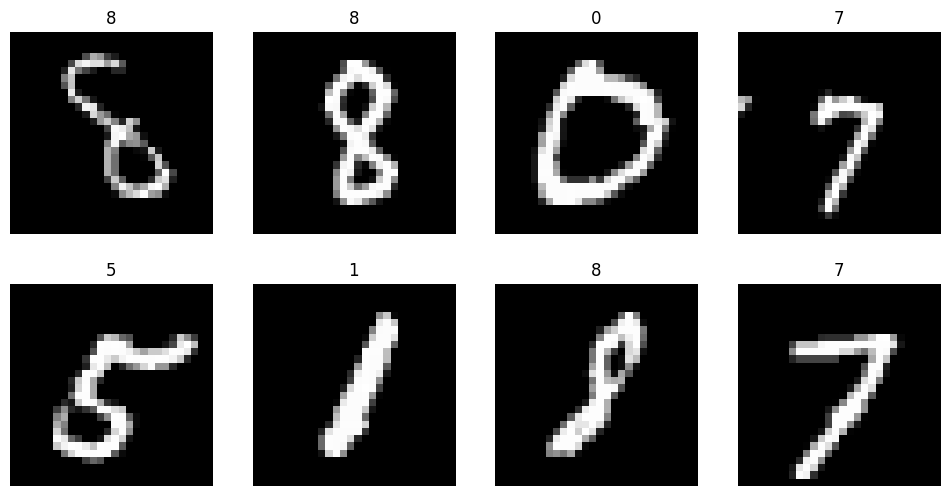

In [146]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 6))
cols, rows = 4, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

#### 신경망 구성  
 - 레이어(layer) : 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받고 하나 이상의 텐서를 출력  
 - 모듈(module) : 한 개 이상의 계층(레이어)이 모여서 구성  
 - 모델(model) : 한 개 이상의 모듈이 모여서 구성  
#### torch.nn 패키지  
주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (weight값 직접 선언 안함)

In [147]:
import torch.nn as nn

In [148]:
# nn.Linear 계층 예
Input = torch.randn(128, 20)
print(Input)

model = nn.Linear(20, 30)
print(model)

output = model(Input)
print(output)
print(output.size())

tensor([[-0.9410, -0.0217, -1.4660,  ..., -0.5704,  0.4502,  0.0523],
        [ 0.5213,  0.1213,  0.1875,  ..., -0.9597,  0.3868, -2.1273],
        [-0.1553,  0.4672,  0.7070,  ..., -0.9156, -2.6565,  1.7411],
        ...,
        [ 0.2833, -0.2413, -0.7234,  ...,  0.6686,  0.4575,  1.0740],
        [-1.5557, -0.8425,  0.1080,  ..., -0.4567, -1.7327, -1.9578],
        [ 2.8685, -0.1230, -0.0447,  ..., -1.0993, -0.3724,  0.6726]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[-0.4337, -0.4232, -0.1382,  ..., -0.1504,  0.0851, -0.5908],
        [ 0.4460, -0.5147, -0.4812,  ..., -0.2972, -0.7145, -0.1335],
        [ 0.0465,  0.3801, -0.4766,  ...,  0.7972, -0.7246, -0.2616],
        ...,
        [ 0.0991,  0.1984,  0.4047,  ...,  0.0692,  0.1430, -0.2168],
        [ 0.7772, -0.2504,  0.6224,  ...,  0.0708, -0.4760, -1.1937],
        [ 1.4848,  1.0596,  1.4242,  ...,  1.1051, -1.6728,  0.3095]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


In [149]:
# nn.Conv2d 계층 예
Input = torch.randn(20, 16, 50, 100)
print(Input.size())

model = nn.Conv2d(16, 33, 3, stride=2)
model = nn.Conv2d(16, 33, (3, 5), stride=(2,1), padding=(4,2))
model = nn.Conv2d(16, 33, (3, 5), stride=(2,1), padding=(4,2), dilation=(3,1))
print(model)

output = model(Input)
print(output.size())

torch.Size([20, 16, 50, 100])
Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
torch.Size([20, 33, 26, 100])


#### Convolution Layers  
nn.Conv2d  
 - in_channels : channel 갯수  
 - out_channels : 출력 채널 갯수  
 - kernal_size : 커널(필터) 사이즈

In [150]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [151]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device("cpu"))
weight = layer.weight

In [152]:
weight.shape
weight = weight.detach()
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

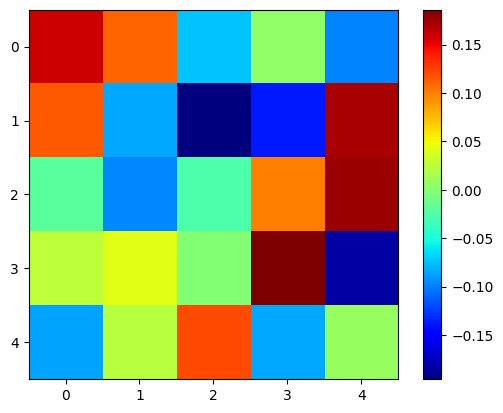

In [153]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [154]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [155]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size())

output_data = layer(input_data)
output = output_data.data 
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

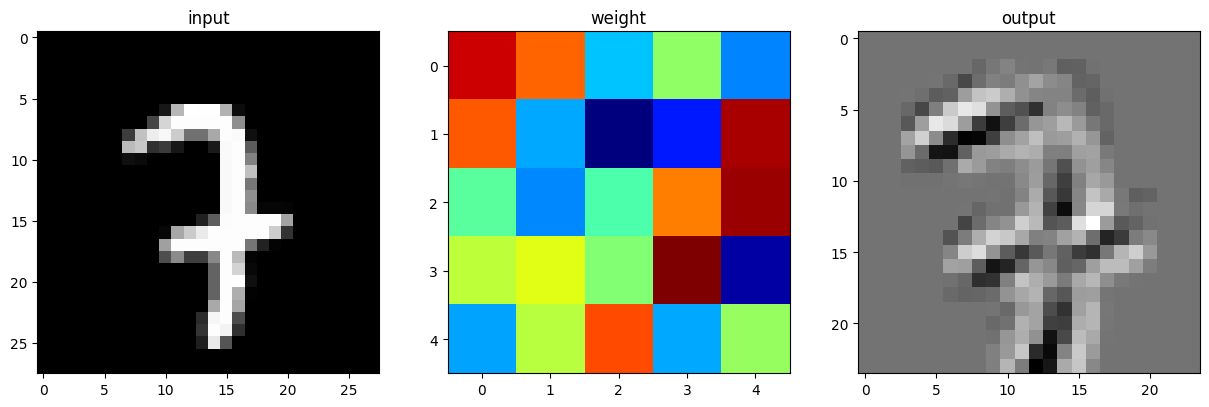

In [156]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title("input")
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title('weight')
plt.imshow(weight[0, 0, :, :], 'jet')

plt.subplot(133)
plt.title('output')
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

#### 풀링 레이어 (Pooling layers)  
 - F.max_pool2d (stride, kernel_size...)  
 - torch.nn.MaxPool2d도 많이 사용

In [157]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

In [158]:
# MaxPool Layer는 weight가 없기 때문에 바로 numpy() 변환 가능
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

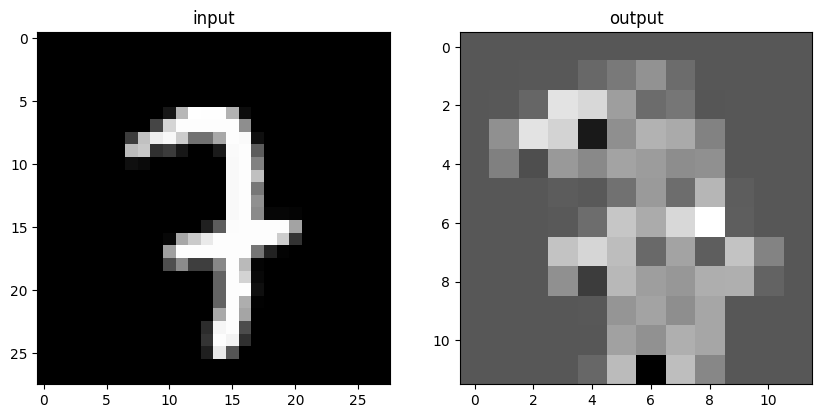

In [159]:
plt.figure(figsize=(10, 15))

plt.subplot(121)
plt.title("input")
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title('output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

#### 선형 레이어 (Linear layers)  
1d 만 가능하므로 .view()를 통해 1d로 펼쳐줘야함

In [160]:
flatten = input_image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [161]:
lin = nn.Linear(784, 10)(flatten)  
lin.shape

torch.Size([1, 10])

In [162]:
lin

tensor([[ 0.2144,  0.0718, -0.0539, -0.2290,  0.1620, -0.4460,  0.0945,  0.2740,
         -0.3252,  0.5137]], grad_fn=<AddmmBackward0>)

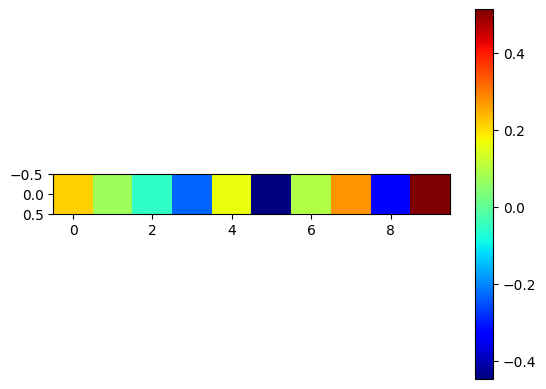

In [163]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

#### 비선형 활성화 함수 (Non-linear Activations function)  
 - F.softmax 같은 활성화 함수 등
: Softmax 함수는 각 클래스에 대한 점수를 계산한 후, 이 점수를 확률로 변환합니다. 이 확률은 0과 1 사이의 값이며, 모든 클래스에 대한 확률의 합은 1입니다.

In [164]:
with torch.no_grad():
    flatten = input_image.view(1, 28*28)
    lin = nn.Linear(784, 10)(flatten)  
    softmax = F.softmax(lin, dim=1)
softmax

tensor([[0.1117, 0.1125, 0.1020, 0.0827, 0.0853, 0.1433, 0.0842, 0.0925, 0.0858,
         0.1001]])

In [165]:
import numpy as np

np.sum(softmax.numpy())

1.0000001

F.ReLU  
 - ReLU함수를 적용하는 레이어  
 - nn.ReLU로도 사용가능  

In [166]:
inputs = torch.randn(4, 3, 28, 28)
inputs.shape

torch.Size([4, 3, 28, 28])

In [167]:
layer = nn.Conv2d(3, 20, 5, 1)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## 모델 정의  
### nn.Module 상속 클래스 정의  
 - _ _ init_ _(): 모델에서 사용될 모듈과 활성화 함수 등을 정의  
 - forward(): 모델에서 실행되어야 하는 연산을 정의  
 

In [168]:
class Model(nn.Module):
    def __init__(self, inputs):
        super(Model, self).__init__()
        self.layer = nn.Linear(inputs, 1)
        self.activation = nn.Sigmoid()
    
    def forward(self, x):
        x = self.layer(x)
        x = self.activation(x)
        return x

In [169]:
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


### nn.Sequential 을 이용한 신경망 정의  
 - nn.Sequential 객체로 그 안에 각 모듈을 순차적으로 실행  
 - _ _ init _ _()에서 사용할 네트워크 모델들을 nn.Sequential로 정의 가능  
 - forward()에서 실행되어야 할 계산을 가독성 높게 작성 가능  

In [170]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1)
        x = self.layer3(x)
        return x

In [171]:
model = Model()
print(list(model.children()))
print()
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]

[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  

### 손실 함수(Loss function)    
 - 예측 값과 실제 값 사이의 오차 측정  
 - 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표  
 - 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표  
 - 손실 함수에 따른 결과를 통해 학습 파라미터를 조정  
 - 최적화 이론에서 최소화하고자 하는 함수  
 - 미분 가능한 함수 사용  
 - 주요 손실 함수   
     -nn.BCELoss : 이진분류에 사용  
     -nn.CrossEntropyLoss : 다중 분류에 사용  
     -nn.MSELoss : 회귀에 사용

### 옵티마이저(Optimizer)  
 - 손실 함수를 기반으로 모델이 어떻게 업데이트해야하는지 결정(특정 종류의 확률적 경사 하강법 구현)  
 - optimizer는 step()을 통해 전달받은 파라미터를 모델 업데이트  
 - 모든 옵티마이저의 기본으로 torch.optim.Optimizer(params, defaults) 클래스 사용  
 - zero_grad()을 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정  
 - torch.optim.lr_scheduler를 이용해 에포크(epochs)에 따라 학습률 조절  
 - Adadelta, Adagrad, Adam, RMSprop, SGD

### 학습률 스케듈러  
 - 일정횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum)근처에 가면 학습률 줄이는 등  
 - lr_scheduler.... ?

#### 지표(Metrics)
 - 모델의 학습과 테스트 단계를 모니터링

In [172]:
import torchmetrics

preds = torch.randn(10, 5).softmax(dim=-1)
target = torch.randint(5, (10, ))
print(preds, target)

acc = torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5) #정확도 계산
print(acc)

tensor([[0.2977, 0.1748, 0.1488, 0.1951, 0.1837],
        [0.0673, 0.4483, 0.2149, 0.0719, 0.1977],
        [0.1686, 0.4492, 0.1125, 0.2186, 0.0511],
        [0.4792, 0.2626, 0.0656, 0.1115, 0.0810],
        [0.3217, 0.2022, 0.0472, 0.1321, 0.2968],
        [0.1044, 0.2911, 0.2169, 0.3617, 0.0260],
        [0.4451, 0.3669, 0.0105, 0.0599, 0.1177],
        [0.2734, 0.3194, 0.1471, 0.1064, 0.1538],
        [0.0651, 0.1234, 0.1917, 0.1906, 0.4292],
        [0.3875, 0.2624, 0.1120, 0.1933, 0.0448]]) tensor([1, 4, 2, 2, 4, 4, 0, 0, 2, 4])
tensor(0.1000)


In [173]:
metric = torchmetrics.Accuracy(task="multiclass", num_classes=5)

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10, 5).softmax(dim=-1)
    target = torch.randint(5, (10, ))

    acc = metric(preds, target)
    print(acc)
acc = metric.compute()
print(acc)

tensor(0.3000)
tensor(0.3000)
tensor(0.)
tensor(0.3000)
tensor(0.1000)
tensor(0.2000)
tensor(0.3000)
tensor(0.2000)
tensor(0.1000)
tensor(0.2000)
tensor(0.2000)


### 선형회귀모델

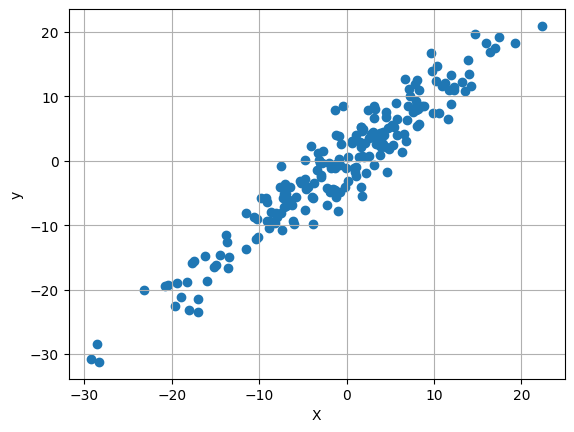

In [174]:
# 데이터 생성
X = torch.randn(200, 1) * 10
y = X + 3*torch.randn(200, 1)
plt.scatter(X.numpy(), y.numpy())
plt.ylabel("y")
plt.xlabel("X")
plt.grid()
plt.show()

In [175]:
# 모델 정의 및 파라미터
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [176]:
model = LinearRegressionModel()
print(model)
print(list(model.children()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Linear(in_features=1, out_features=1, bias=True)]


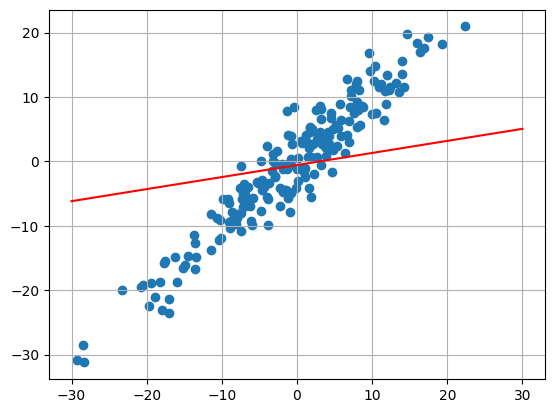

In [177]:
w, b = model.parameters()
w1, b1 = torch.Tensor.item(w), torch.Tensor.item(b)
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

In [178]:
# 손실 함수 및 옵티마이저 
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model. parameters(), lr=0.001)

In [179]:
#모델 학습
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    loss.backward()

    optimizer.step()

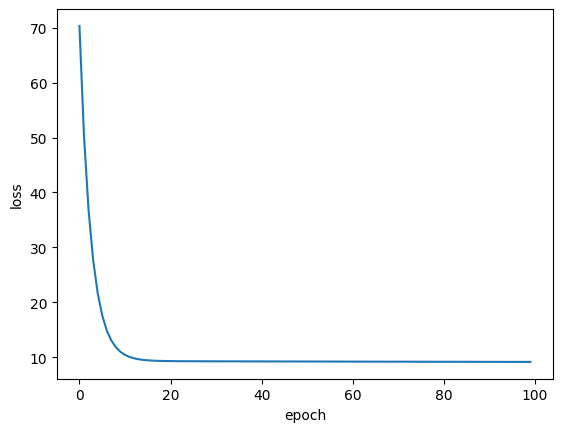

In [180]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

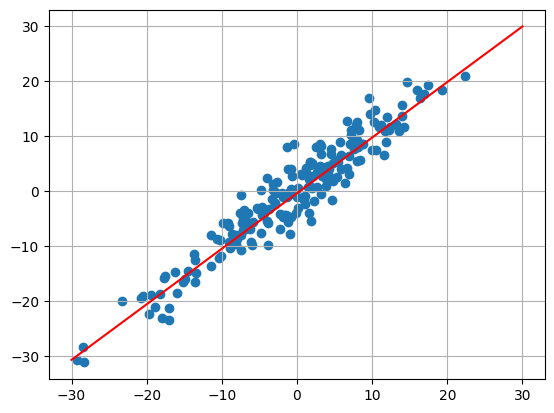

In [181]:
w1, b1 = torch.Tensor.item(w), torch.Tensor.item(b)
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

### FashionMNIST 분류 모델

In [182]:
# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [184]:
# 데이터 로드

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])

In [185]:
trainset = datasets.FashionMNIST(PATH, train=True, download=True, transform=transform)
testset = datasets.FashionMNIST(PATH, train=False, download=True, transform=transform)

100%|██████████| 26421880/26421880 [00:15<00:00, 1692015.57it/s]


Extracting ./FashionMNIST\raw\train-images-idx3-ubyte.gz to ./FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 98725.28it/s]


Extracting ./FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:04<00:00, 1036878.56it/s]


Extracting ./FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./FashionMNIST\raw



In [186]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

In [188]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

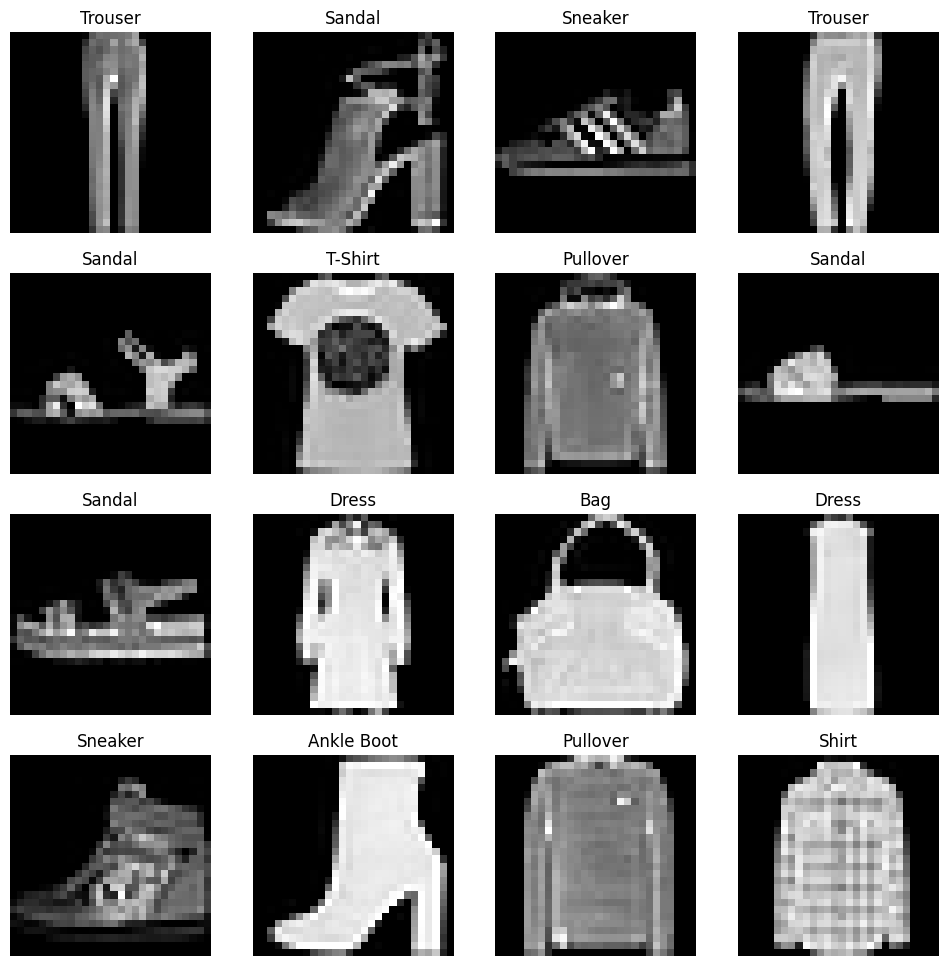

In [190]:
labels_map = {
    0: "T-Shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot"
}

figure = plt.figure(figsize=(12, 12))
cols, rows = 4, 4
for i in range(1, cols * rows+1):
    image = images[i].squeeze()
    label_idx = labels[i].item()
    label = labels_map[label_idx]

    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
plt.show()

In [192]:
# 모델 정의 및 파라미터
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        
        return num_features

net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [194]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [195]:
Input = torch.randn(1,1,28,28)
out = net(Input)
print(out)

tensor([[-0.0696, -0.0721, -0.1247,  0.0845, -0.0791,  0.0595, -0.0359,  0.0473,
          0.1706, -0.0394]], grad_fn=<AddmmBackward0>)


In [196]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [197]:
total_batch = len(train_loader)
print(total_batch)

469


In [198]:
for epoch in range(10):
    running_loss = 0.0

    for i, data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i%100 == 99:
            print(f"Epoch : {i+1}, running_loss : {running_loss / 2000}")
            running_loss = 0

Epoch : 100, running_loss : 0.11518329477310181
Epoch : 200, running_loss : 0.1149514137506485
Epoch : 300, running_loss : 0.11466867029666901
Epoch : 400, running_loss : 0.1143308048248291
Epoch : 100, running_loss : 0.11337690460681915
Epoch : 200, running_loss : 0.11216934072971343
Epoch : 300, running_loss : 0.10951104021072387
Epoch : 400, running_loss : 0.10182106882333755
Epoch : 100, running_loss : 0.06582694816589356
Epoch : 200, running_loss : 0.05264933320879936
Epoch : 300, running_loss : 0.04547618073225022
Epoch : 400, running_loss : 0.041233755379915235
Epoch : 100, running_loss : 0.03720644852519035
Epoch : 200, running_loss : 0.035751302391290665
Epoch : 300, running_loss : 0.034857879549264906
Epoch : 400, running_loss : 0.032857874304056164
Epoch : 100, running_loss : 0.03134027367830276
Epoch : 200, running_loss : 0.030482485666871072
Epoch : 300, running_loss : 0.030195184633135797
Epoch : 400, running_loss : 0.028966739282011985
Epoch : 100, running_loss : 0.02779

### 모델의 저장 및 로드  
 - torch.save : net.state_dict()를 저장  
 - torch.load : load_state_dict로 모델을 도르

In [199]:
state_PATH = './fashion_mnist.pth'
torch.save(net.state_dict(), state_PATH)

In [200]:
net = NeuralNet()
net.load_state_dict(torch.load(state_PATH))

<All keys matched successfully>

In [201]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [203]:
# 테스트
def imshow(image):
    image = image/2 + 0.5
    npimg = image.numpy()

    fig = plt.figure(figsize=(16,8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

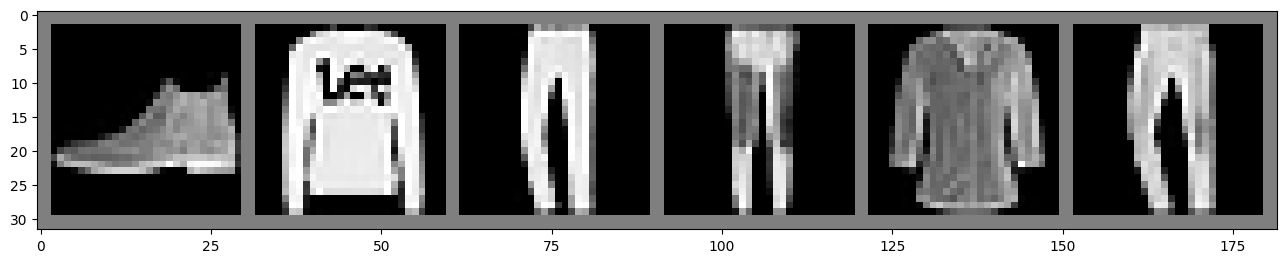

In [204]:
import torchvision

dataiter = iter(test_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:6]))

In [205]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([9, 2, 1, 1, 6, 1, 6, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5,
        1, 6, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 9, 4, 7, 2, 1,
        4, 2, 2, 2, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 4, 7, 8, 7, 0,
        2, 3, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 2, 7, 1, 8,
        0, 1, 2, 2, 3, 4, 7, 2, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4])


In [207]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Ankle Boot, Pullover, Trouser, Trouser, Shirt, Trouser, 


In [208]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(100 * correct / total)

82.86
